# ARMA Exercise

Roadmap for ARMA analysis

### 1. Download dataset from Kaggle

In [148]:
import os
import zipfile
import pandas as pd

initial_working_directory = os.getcwd()

kaggle_dataset = "fedesoriano/electric-power-consumption"

kaggle_json_path = 'G:\\My Drive\\pyProjs\\pyTimeSeriesDataAnalysis\\kaggle'

os.environ['KAGGLE_CONFIG_DIR'] = kaggle_json_path

target_dir = f'C:\\Users\\fmiranda\\Documents\\Kaggle\\{kaggle_dataset}'

if not os.path.exists(target_dir):
    os.makedirs(target_dir)

os.chdir(target_dir)

In [149]:
!kaggle datasets download -d {kaggle_dataset}

electric-power-consumption.zip: Skipping, found more recently modified local copy (use --force to force download)


In [150]:
dataset_filename = kaggle_dataset.split('/')[-1]

with zipfile.ZipFile(f'{dataset_filename}.zip', 'r') as zip_ref:
    zip_ref.extractall()

### 2. Load dataset

In [151]:
df = pd.read_csv('powerconsumption.csv')

In [152]:
os.chdir(initial_working_directory)

### 3. Exploratory Data Analysis

In [153]:
df.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [155]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


In [156]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

df.set_index('Datetime', inplace=True)

df = df.asfreq('10T')

In [157]:
df.index

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:10:00',
               '2017-01-01 00:20:00', '2017-01-01 00:30:00',
               '2017-01-01 00:40:00', '2017-01-01 00:50:00',
               '2017-01-01 01:00:00', '2017-01-01 01:10:00',
               '2017-01-01 01:20:00', '2017-01-01 01:30:00',
               ...
               '2017-12-30 22:20:00', '2017-12-30 22:30:00',
               '2017-12-30 22:40:00', '2017-12-30 22:50:00',
               '2017-12-30 23:00:00', '2017-12-30 23:10:00',
               '2017-12-30 23:20:00', '2017-12-30 23:30:00',
               '2017-12-30 23:40:00', '2017-12-30 23:50:00'],
              dtype='datetime64[ns]', name='Datetime', length=52416, freq='10T')

In [158]:
df['PowerConsumption'] = df['PowerConsumption_Zone1'] + df['PowerConsumption_Zone2'] + df['PowerConsumption_Zone3']

In [159]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,PowerConsumption
Datetime,,,,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,70425.53544
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,69320.84387
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,67803.22193
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,65489.23209
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,63650.44627


In [162]:
df_old = df

In [163]:
df = df[['PowerConsumption']]

In [164]:
df.head()

,PowerConsumption
Datetime,
2017-01-01 00:00:00,70425.53544
2017-01-01 00:10:00,69320.84387
2017-01-01 00:20:00,67803.22193
2017-01-01 00:30:00,65489.23209
2017-01-01 00:40:00,63650.44627


In [165]:
df_daily = df.resample('D').sum()

In [166]:
df_daily.head()

,PowerConsumption
Datetime,
2017-01-01,9.226342e+06
2017-01-02,9.539709e+06
2017-01-03,9.826635e+06
2017-01-04,9.859047e+06
2017-01-05,9.864148e+06


In [167]:
df = df_daily

### 4. Data cleaning

In [168]:
df.isna().sum()

PowerConsumption    0
dtype: int64

### 5. Exploratory Data Analysis

Text(0, 0.5, 'Power Consumption')

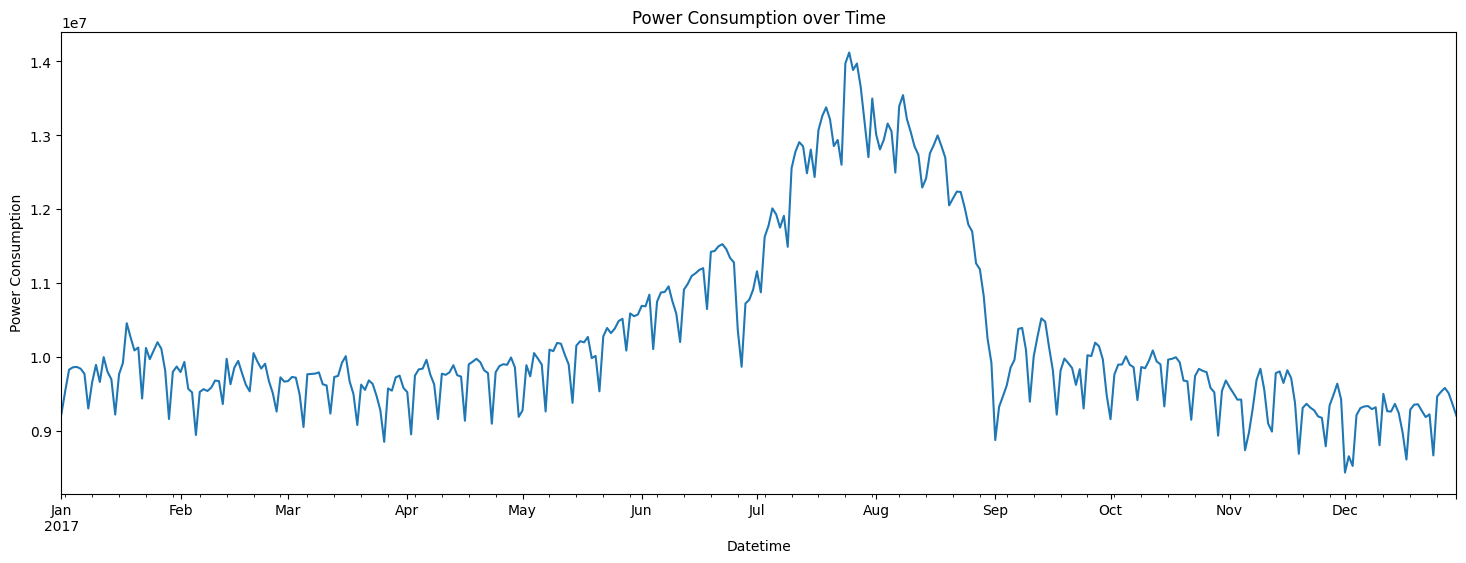

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

df['PowerConsumption'].plot(figsize=(18,6))
plt.title('Power Consumption over Time')
plt.ylabel('Power Consumption')

Text(0, 0.5, 'Frequency')

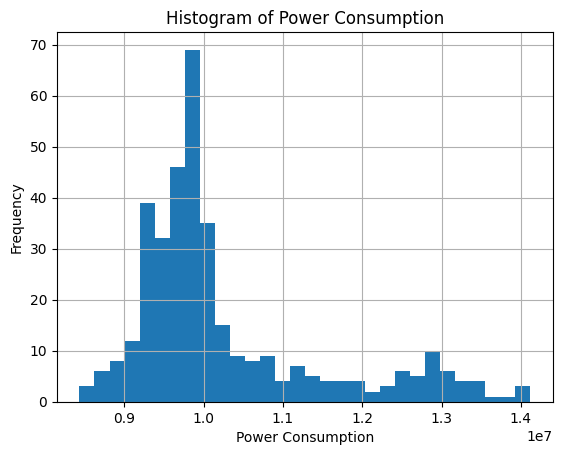

In [98]:
df['PowerConsumption'].hist(bins=30)
plt.title('Histogram of Power Consumption')
plt.xlabel('Power Consumption')
plt.ylabel('Frequency')

([<matplotlib.axis.XTick at 0x1628043ac50>,
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

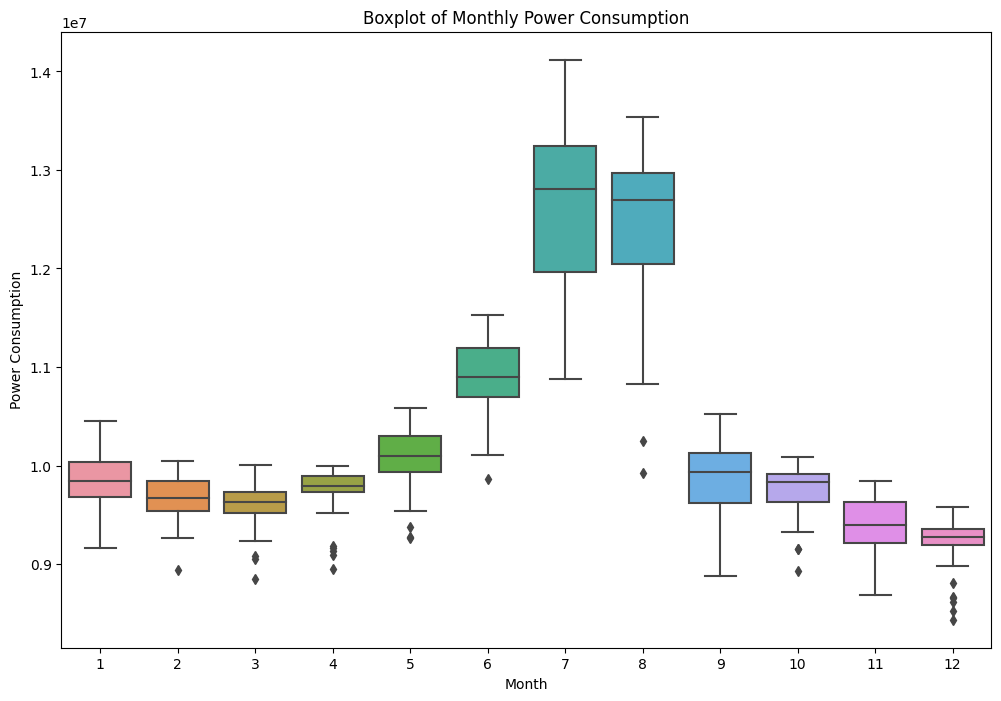

In [101]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.boxplot(x=df.index.month, y=df['PowerConsumption'])
plt.title('Boxplot of Monthly Power Consumption')
plt.xlabel('Month')
plt.ylabel('Power Consumption')
plt.xticks(np.arange(12))

([<matplotlib.axis.XTick at 0x16280a67c90>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

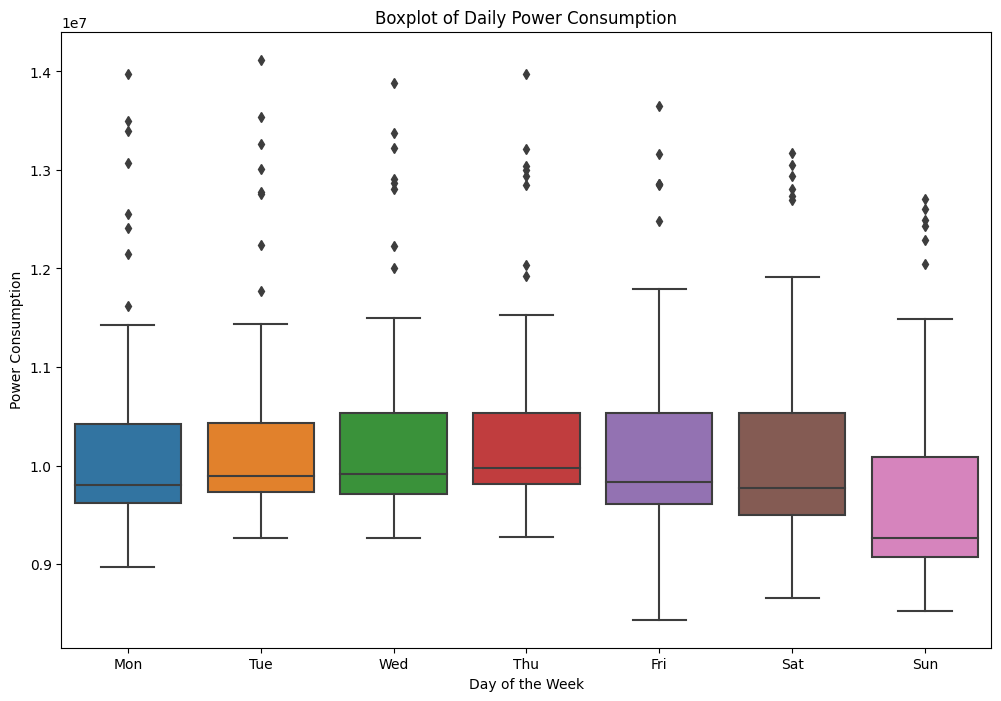

In [102]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=df.index.dayofweek, y=df['PowerConsumption'])
plt.title('Boxplot of Daily Power Consumption')
plt.xlabel('Day of the Week')
plt.ylabel('Power Consumption')
plt.xticks(np.arange(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

Text(0.5, 0, 'Power Consumption')

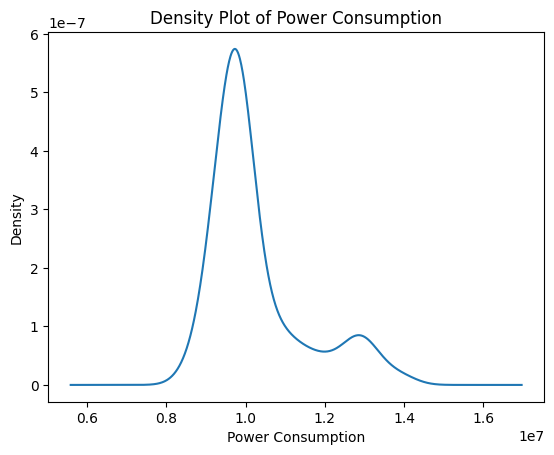

In [103]:
df['PowerConsumption'].plot(kind='kde')
plt.title('Density Plot of Power Consumption')
plt.xlabel('Power Consumption')

Text(0.5, 1.0, 'Autocorrelation of Power Consumption')

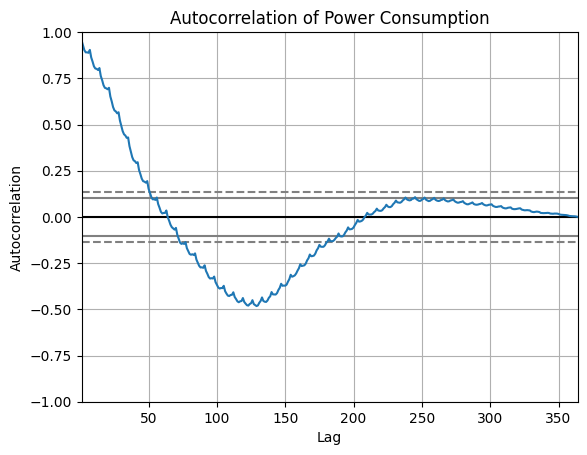

In [104]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['PowerConsumption'])
plt.title('Autocorrelation of Power Consumption')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

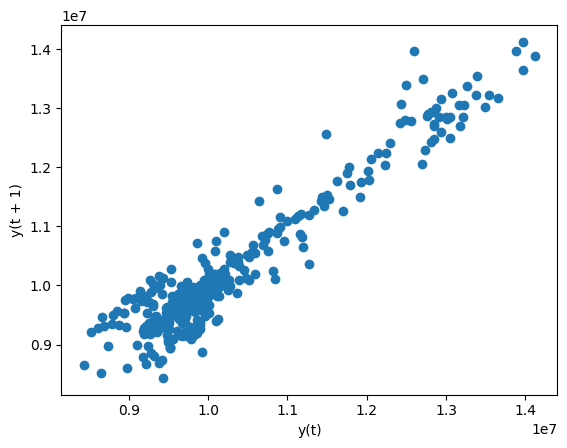

In [105]:
pd.plotting.lag_plot(df['PowerConsumption'])

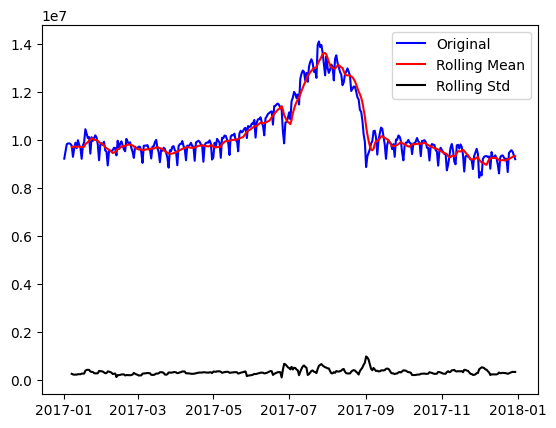

In [107]:
rolling_mean = df['PowerConsumption'].rolling(window=7).mean()
rolling_std = df['PowerConsumption'].rolling(window=7).std()
plt.plot(df['PowerConsumption'], color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')

### 6. ETS decomposition

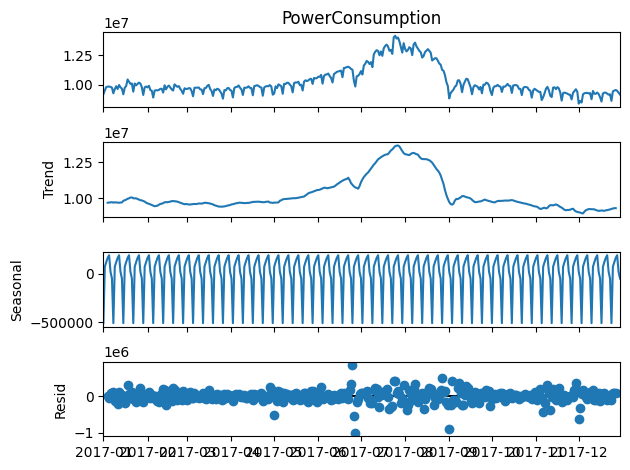

In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df['PowerConsumption'])

decomposed.plot();

### 7. Test for stationarity

In [109]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [170]:
adf_test(df['PowerConsumption'], 'Power Consumption in Morocco 2017')

Augmented Dickey-Fuller Test: Power Consumption in Morocco 2017
ADF test statistic       -1.796577
p-value                   0.382163
# lags used              14.000000
# observations          349.000000
critical value (1%)      -3.449227
critical value (5%)      -2.869857
critical value (10%)     -2.571201
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [171]:
from statsmodels.tsa.stattools import kpss

kpss_test = kpss(df['PowerConsumption'], regression='c')

statistic, p_value, n_lags, critical_values = kpss_test

print(f'KPSS Statistic: {statistic}')
print(f'P-Value: {p_value}')
print(f'Number of Lags Used: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')

alpha = 0.05
if p_value > alpha:
    print('The null hypothesis cannot be rejected (The series is stationary)')
else:
    print('The null hypothesis can be rejected (The series is not stationary)')

KPSS Statistic: 0.5002567773688996
P-Value: 0.04160883392592351
Number of Lags Used: 11
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The null hypothesis can be rejected (The series is not stationary)


In [172]:
from arch.unitroot import PhillipsPerron

pp_test = PhillipsPerron(df['PowerConsumption'])

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -2.444
P-value                         0.130
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### 8. Make the series stationary

In [173]:
df_diff = df.diff().dropna()

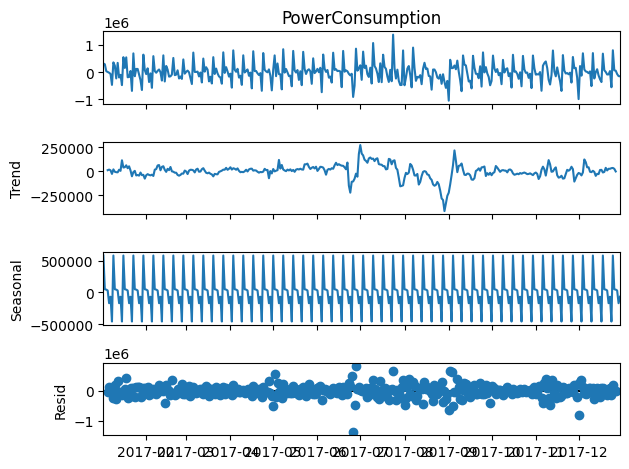

In [174]:
decomposed = seasonal_decompose(df_diff['PowerConsumption'])

decomposed.plot();

In [177]:
adf_test(df_diff['PowerConsumption'], 'Power Consumption in Morocco 2017')

Augmented Dickey-Fuller Test: Power Consumption in Morocco 2017
ADF test statistic       -4.341354
p-value                   0.000376
# lags used              14.000000
# observations          348.000000
critical value (1%)      -3.449282
critical value (5%)      -2.869881
critical value (10%)     -2.571214
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [180]:
kpss_test = kpss(df_diff['PowerConsumption'], regression='c')

statistic, p_value, n_lags, critical_values = kpss_test

print(f'KPSS Statistic: {statistic}')
print(f'P-Value: {p_value}')
print(f'Number of Lags Used: {n_lags}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key} : {value}')

alpha = 0.05
if p_value > alpha:
    print('The null hypothesis cannot be rejected (The series is stationary)')
else:
    print('The null hypothesis can be rejected (The series is not stationary)')

KPSS Statistic: 0.15417445137407632
P-Value: 0.1
Number of Lags Used: 25
Critical Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
The null hypothesis cannot be rejected (The series is stationary)


In [181]:
pp_test = PhillipsPerron(df_diff['PowerConsumption'])

print(pp_test.summary())

     Phillips-Perron Test (Z-tau)    
Test Statistic                -26.599
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


### 8. ACF and PACF plots

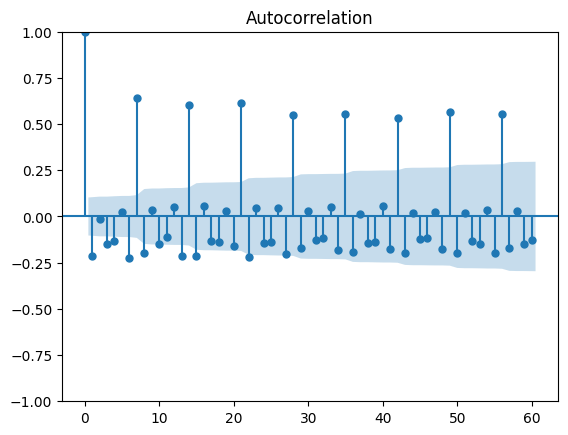

In [182]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_diff, lags=60);

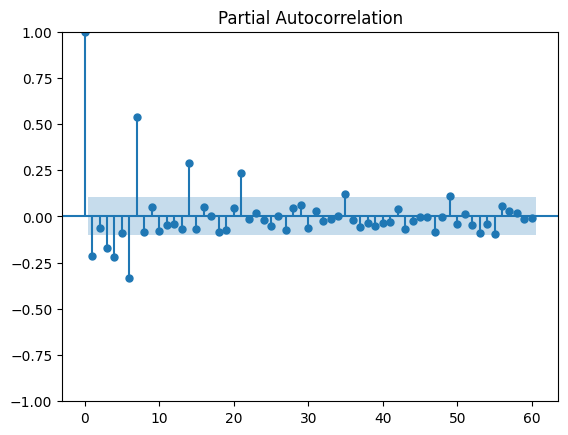

In [183]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_diff, lags=60);

### 9. Determine ARMA orders

In [184]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

model_auto = auto_arima(df_diff['PowerConsumption'], trace=True, seasonal=True,
                        error_action='ignore', suppress_warnings=True, stepwise=True)

model_auto.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=10291.113, Time=0.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10316.542, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=10301.900, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10298.118, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=10314.542, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=10287.625, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=10291.352, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=10285.961, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=10287.615, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=10302.505, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=10283.833, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=10296.097, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=10299.899, Time=0.01 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=10285.510, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  363
Model:               SARIMAX(1, 0, 1)   Log Likelihood               -5138.916
Date:                Sat, 03 Jun 2023   AIC                          10283.833
Time:                        17:02:27   BIC                          10295.516
Sample:                    01-02-2017   HQIC                         10288.477
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4421      0.107      4.148      0.000       0.233       0.651
ma.L1         -0.7286      0.081     -9.038      0.000      -0.887      -0.571
sigma2       1.21e+11   7.45e-13   1.63e+23      0.000    1.21e+11    1.21e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                19.56
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.28
Prob(H) (two-sided):                  0.15   Kurtosis:                         3.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.47e+38. Standard errors may be unstable.
"""

In [185]:
print(model_auto.order)

(1, 0, 1)


### 10. Split dataset

In [236]:
train = df_diff[:-12]
test = df_diff[-12:]

### 11. Fit an ARMA model

In [237]:
from statsmodels.tsa.arima.model import ARIMA

p = 1
q = 1

model = ARIMA(train, order=(p, 0, q))
model_fit = model.fit()

### 12. Examine the ARMA summary

In [238]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       PowerConsumption   No. Observations:                  351
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -4971.370
Date:                Sat, 03 Jun 2023   AIC                           9950.740
Time:                        17:53:35   BIC                           9966.183
Sample:                    01-02-2017   HQIC                          9956.886
                         - 12-18-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.2897   1.16e+04      0.015      0.988   -2.26e+04    2.29e+04
ar.L1          0.4432      0.124      3.565      0.000       0.200       0.687
ma.L1         -0.7263      0.088     -8.265      0.0

### 13. Predict on test set

In [239]:
pred = model_fit.predict(start=test.index[0], end=test.index[-1])

In [240]:
# inverse transform
pred = pred.cumsum() + df.loc[test.index[0]-pd.DateOffset(days=1), 'PowerConsumption']

In [241]:
pred.head()

2017-12-19    9.213466e+06
2017-12-20    9.181519e+06
2017-12-21    9.167454e+06
2017-12-22    9.161315e+06
2017-12-23    9.158688e+06
Freq: D, Name: predicted_mean, dtype: float64

### 14. Evaluate model performance

In [242]:
test_inverse = df[-12:]

In [243]:
test_inverse = test_inverse['PowerConsumption']

In [211]:
test_inverse

Datetime
2017-12-19    9.352942e+06
2017-12-20    9.358016e+06
2017-12-21    9.269846e+06
2017-12-22    9.185044e+06
2017-12-23    9.221982e+06
2017-12-24    8.665953e+06
2017-12-25    9.464501e+06
2017-12-26    9.527927e+06
2017-12-27    9.579272e+06
2017-12-28    9.506777e+06
2017-12-29    9.358808e+06
2017-12-30    9.204160e+06
Freq: D, Name: PowerConsumption, dtype: float64

In [212]:
pred

2017-12-19    9.213466e+06
2017-12-20    9.181519e+06
2017-12-21    9.167454e+06
2017-12-22    9.161315e+06
2017-12-23    9.158688e+06
2017-12-24    9.157619e+06
2017-12-25    9.157239e+06
2017-12-26    9.157165e+06
2017-12-27    9.157226e+06
2017-12-28    9.157347e+06
2017-12-29    9.157496e+06
2017-12-30    9.157655e+06
Freq: D, Name: predicted_mean, dtype: float64

In [213]:
print(type(test_inverse))

<class 'pandas.core.series.Series'>


In [214]:
print(type(pred))

<class 'pandas.core.series.Series'>


In [244]:
results = pd.DataFrame({
    'Actual': test_inverse,  # these are your true values
    'Predicted': pred  # these are your predicted values
})

print(results)

                  Actual     Predicted
2017-12-19  9.352942e+06  9.213466e+06
2017-12-20  9.358016e+06  9.181519e+06
2017-12-21  9.269846e+06  9.167454e+06
2017-12-22  9.185044e+06  9.161315e+06
2017-12-23  9.221982e+06  9.158688e+06
2017-12-24  8.665953e+06  9.157619e+06
2017-12-25  9.464501e+06  9.157239e+06
2017-12-26  9.527927e+06  9.157165e+06
2017-12-27  9.579272e+06  9.157226e+06
2017-12-28  9.506777e+06  9.157347e+06
2017-12-29  9.358808e+06  9.157496e+06
2017-12-30  9.204160e+06  9.157655e+06


In [245]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, median_absolute_error, explained_variance_score

mae = mean_absolute_error(test_inverse, pred)
mse = mean_squared_error(test_inverse, pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_inverse, pred)
adj_r2 = 1 - ((1 - r2)*(len(test_inverse)-1)/(len(test_inverse)-1-1))
msle = mean_squared_log_error(test_inverse, pred)
medae = median_absolute_error(test_inverse, pred)
evs = explained_variance_score(test_inverse, pred)

In [246]:
metrics = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'MSLE', 'MedAE', 'EVS'],
                        'Value': [mae, mse, rmse, r2, adj_r2, msle, medae, evs]})

print(metrics)

        Metric         Value
0          MAE  2.245309e+05
1          MSE  7.351509e+10
2         RMSE  2.711367e+05
3           R2 -3.783137e-01
4  Adjusted R2 -5.161451e-01
5         MSLE  8.672326e-04
6        MedAE  1.889049e+05
7          EVS  2.865724e-03


### 15. Plot predictions vs. actuals

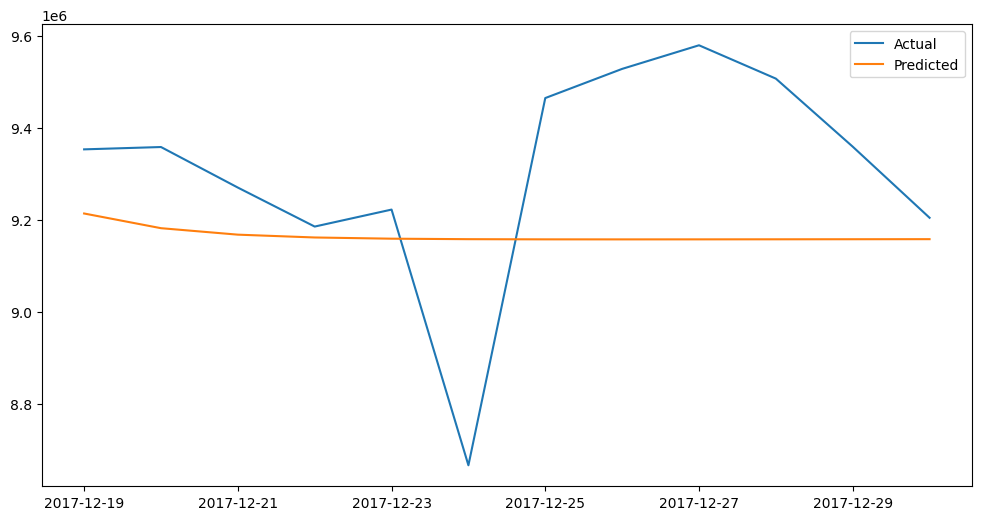

In [247]:
plt.figure(figsize=(12,6))
plt.plot(test_inverse, label='Actual')
plt.plot(pred, label='Predicted')
plt.legend()

### 16. Search for alternative ARMA orders

In [222]:
best_aic = np.inf
best_order = None

for p in range(15):
    for q in range(15):
        try:
            model = ARIMA(train, order=(p, 0, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, q)
        except:
            continue


In [223]:
print(best_order)

(7, 9)


In [248]:
new_model = ARIMA(train, order=(7,0,9))
new_model_fit = new_model.fit()

In [249]:
print(new_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       PowerConsumption   No. Observations:                  351
Model:                 ARIMA(7, 0, 9)   Log Likelihood               -4824.233
Date:                Sat, 03 Jun 2023   AIC                           9684.466
Time:                        17:54:27   BIC                           9753.960
Sample:                    01-02-2017   HQIC                          9712.124
                         - 12-18-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        169.2897   1.74e-06   9.72e+07      0.000     169.290     169.290
ar.L1         -0.0126      0.048     -0.263      0.793      -0.107       0.081
ar.L2         -0.0119      0.048     -0.246      0.8

### 17. Take predictions from new model

In [253]:
new_pred = new_model_fit.predict(start=test.index[0], end=test.index[-1])

In [254]:
# inverse transform
new_pred = new_pred.cumsum() + df.loc[test.index[0]-pd.DateOffset(days=1), 'PowerConsumption']

In [255]:
new_pred.head()

2017-12-19    9.351988e+06
2017-12-20    9.380237e+06
2017-12-21    9.426795e+06
2017-12-22    9.220903e+06
2017-12-23    9.167561e+06
Freq: D, Name: predicted_mean, dtype: float64

### 18. Evaluate new model

In [256]:
new_results = pd.DataFrame({
    'Actual': test_inverse,  # these are your true values
    'Predicted': new_pred  # these are your predicted values
})

print(new_results)

                  Actual     Predicted
2017-12-19  9.352942e+06  9.351988e+06
2017-12-20  9.358016e+06  9.380237e+06
2017-12-21  9.269846e+06  9.426795e+06
2017-12-22  9.185044e+06  9.220903e+06
2017-12-23  9.221982e+06  9.167561e+06
2017-12-24  8.665953e+06  8.733125e+06
2017-12-25  9.464501e+06  9.305117e+06
2017-12-26  9.527927e+06  9.384703e+06
2017-12-27  9.579272e+06  9.422843e+06
2017-12-28  9.506777e+06  9.468966e+06
2017-12-29  9.358808e+06  9.260962e+06
2017-12-30  9.204160e+06  9.208500e+06


In [257]:
mae = mean_absolute_error(test_inverse, new_pred)
mse = mean_squared_error(test_inverse, new_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_inverse, new_pred)
adj_r2 = 1 - ((1 - r2)*(len(test_inverse)-1)/(len(test_inverse)-1-1))
msle = mean_squared_log_error(test_inverse, new_pred)
medae = median_absolute_error(test_inverse, new_pred)
evs = explained_variance_score(test_inverse, new_pred)

In [258]:
new_metrics = pd.DataFrame({'Metric': ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'MSLE', 'MedAE', 'EVS'],
                        'Value': [mae, mse, rmse, r2, adj_r2, msle, medae, evs]})

print(new_metrics)

        Metric         Value
0          MAE  7.805074e+04
1          MSE  9.608010e+09
2         RMSE  9.802046e+04
3           R2  8.198621e-01
4  Adjusted R2  8.018484e-01
5         MSLE  1.094045e-04
6        MedAE  6.079636e+04
7          EVS  8.370685e-01


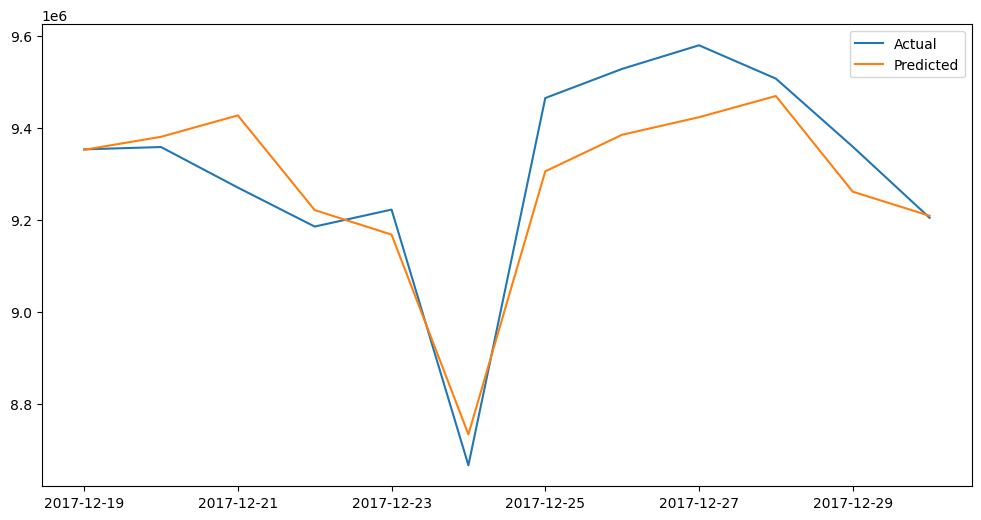

In [260]:
plt.figure(figsize=(12,6))
plt.plot(test_inverse, label='Actual')
plt.plot(new_pred, label='Predicted')
plt.legend()

### 19. Forecast

In [271]:
n_forecast = 30  # change to the number of periods you want to forecast
forecast = new_model_fit.forecast(steps=n_forecast)

In [272]:
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date, periods=n_forecast+1, closed='right')  # we exclude the first period with 'right'

In [273]:
df_forecast_diff = pd.Series(forecast, index=forecast_index)
df_forecast = df['PowerConsumption'].iloc[-1] + df_forecast_diff.cumsum()

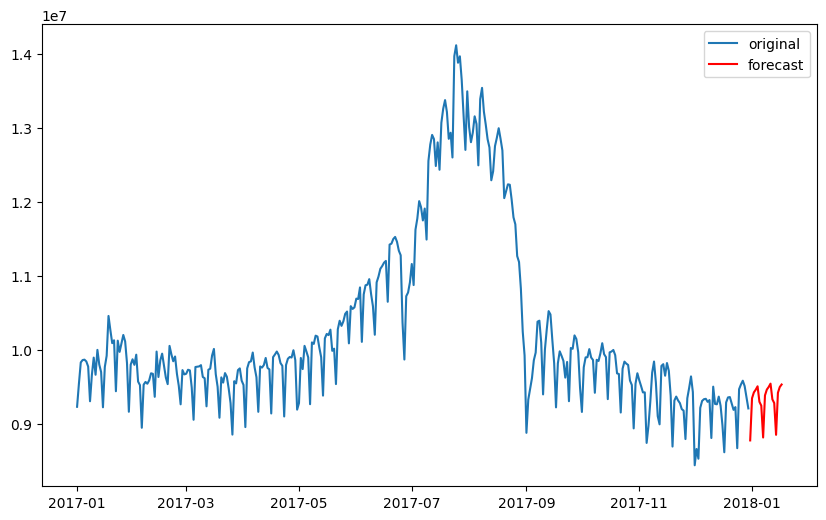

In [274]:
plt.figure(figsize=(10, 6))
plt.plot(df['PowerConsumption'], label='original')
plt.plot(df_forecast, label='forecast', c='red')
plt.legend()